In [1]:
#Prediction of health insurance cost by gradient bossting regressor.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
my_data = pd.read_csv('insurance.csv')
my_data.keys()

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [3]:
data = pd.DataFrame(my_data)
data

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [4]:
np.sum(data.isna())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [5]:
def gender(x):                  
    if x== 'male':
        return 1
    else:
        x== 'female'
        return 0

In [6]:
data['sex'] = data['sex'].apply(gender)
data

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,yes,southwest,16884.92
1,18,1,33.8,1,no,southeast,1725.55
2,28,1,33.0,3,no,southeast,4449.46
3,33,1,22.7,0,no,northwest,21984.47
4,32,1,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,no,northwest,10600.55
1334,18,0,31.9,0,no,northeast,2205.98
1335,18,0,36.9,0,no,southeast,1629.83
1336,21,0,25.8,0,no,southwest,2007.95


In [7]:
data1 = data.replace(to_replace={'yes':1,'no':0})

In [8]:
final_data =data1.replace(to_replace={'northwest':0,'northeast':1,'southwest':2,'southeast':3})

In [9]:
final_data

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,2,16884.92
1,18,1,33.8,1,0,3,1725.55
2,28,1,33.0,3,0,3,4449.46
3,33,1,22.7,0,0,0,21984.47
4,32,1,28.9,0,0,0,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,0,10600.55
1334,18,0,31.9,0,0,1,2205.98
1335,18,0,36.9,0,0,3,1629.83
1336,21,0,25.8,0,0,2,2007.95


In [10]:
final_data.shape

(1338, 7)

In [11]:
x = final_data.drop('expenses',axis=1)
y = final_data.expenses

In [58]:
gdb = GradientBoostingRegressor(learning_rate=0.01, n_estimators=250)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=50)

In [59]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(936, 6)
(402, 6)
(936,)
(402,)


In [60]:
gdb.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=250,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [61]:
predicted = gdb.predict(x_test)

In [62]:
r2_score(y_test,predicted)

0.8761741424790326

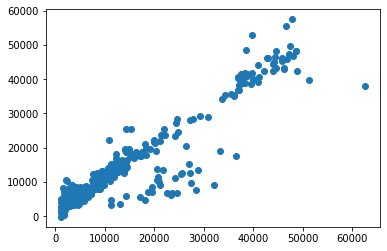

In [37]:
plt.scatter(y_test,predicted)